# How to explore the data : A starter notebook

EDA or Exploratory Data Analysis is an important aspect of any Data Analysis task. EDA essentially refers to employing a variety of techniques to uncover some underlying patterns in data. This in turn helps to get insights into the data which might otherwise may not be apparent. Apart from this EDA can also help detect outliers, missing values and at times corrupted data. There is no single technique to perform EDA. This means there are no set of rules to analyse and explore data but there are some ways by which you can get started when you encounter a new dataset. 

In a way, EDA helps to explore and gather hidden insights which are backed by data and not by mere assumptions.


## Ways to proceed in this competition

Before proceeding, it is advisable to go through https://www.kaggle.com/rohanrao/chai-time-data-science/discussion/156137 to understand the context of the competition.

**Step 1**: You can either fork this notebook and continue working on this as a base notebook by clicking on the "**Copy and Edit**" button in the top right corner of this window.

Alternatively, you can create a fresh notebook by clicking on the "**New Notebook**" button on the Dataset's Homepage.

**Step 2**: Click on the "**Save Version**" button to publish your notebook.

**Step 3**: Adjust the "**Sharing"/"Access**" setting to change your notebook from private to public (and add citations if necessary).

**Step 4**: Explore additional analyses at https://www.kaggle.com/rohanrao/chai-time-data-science/version/5/kernels

**Step 5**: Tell a story using the data for the chance to win a prize!

**Step 6**: Make a Submission on or before 14th July, 2020. To be accepted as a valid submission, you need to submit your public notebook to the Task here : https://www.kaggle.com/rohanrao/chai-time-data-science/tasks?taskId=1183. Here is a.gif which explains the process in more detail.

![](https://imgur.com/rYglABC.gif)

Remember that only the notebooks submitted to the Task will be eligible for a prize.

Let's start by exploring the dataset and see if we can uncover some interesting facts which could benefit the [CTDS show](https://chaitimedatascience.com/).

In [1]:
!pip install dexplot

     |████████████████████████████████| 173 kB 4.7 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import dexplot as dxp
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#plotly
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


import re                                  # library for regular expression operations
import string                              # for string operations
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

#datetime
from datetime import datetime
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



     |████████████████████████████████| 64 kB 1.6 MB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/chai-time-data-science/YouTube Thumbnail Types.csv
/kaggle/input/chai-time-data-science/Episodes.csv
/kaggle/input/chai-time-data-science/Anchor Thumbnail Types.csv
/kaggle/input/chai-time-data-science/Description.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E22.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E75.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E24.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E42.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E74.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E70.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E60.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E53.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E34.csv
/kaggle/input/chai-time-data-science/Cleaned Subtitles/E64.csv
/kaggle/input/

# Datasets

The dataset consists of metadata of all episodes like title, category, flavour of tea, recording/release dates along with statistics like duration, views, watch hours from YouTube, Spotify, Apple now updated until 00:00 21st June, 2020. Following data files are available :

* `Description.csv` : This file consists of the descriptions texts from YouTube and Audio

* `Episodes.csv` : This file contains the statistics of all the Episodes of the Chai Time Data Science show.

* `YouTube Thumbnail Types.csv` : This file consists of the description of Anchor/Audio thumbnail of the episodes

* `Anchor Thumbnail Types.csv` : his file contains the statistics of the Anchor/Audio thumbnail

* `Raw Subtitles` : It is a zip file containing 74 text files having raw subtitles of all the episodes

* `Cleaned Subtitles` : Zip file containing cleaned subtitles

One could either choose to create a story around all the datafiles or explore a subset.


# Loading the Dataset

We shall begin by importing the various datasets and the necessary libraries for the analysis.Let's first import the non-subtitles datasets.

In [3]:
ctds_episodes = pd.read_csv('../input/chai-time-data-science/Episodes.csv',parse_dates=['recording_date','release_date'])
youtube_thumbnails = pd.read_csv('../input/chai-time-data-science/YouTube Thumbnail Types.csv')
anchor_thumbnails = pd.read_csv('../input/chai-time-data-science/Anchor Thumbnail Types.csv')
description = pd.read_csv('../input/chai-time-data-science/Description.csv')



Let's now view all the imported datasets.

In [4]:
print("youtube_thumbnails dataset")
youtube_thumbnails.head()


youtube_thumbnails dataset


,youtube_thumbnail_type,description,youtube_default,annotation,mini_series,ctds_brand
0,0,YouTube default image,1,0,0,0
1,1,YouTube default image with custom annotation,1,1,0,0
2,2,Mini Series: Custom Image with annotations,0,1,1,0
3,3,"Custom image with CTDS branding, Title and Tags",0,1,0,1


In [5]:
print("anchor_thumbnails dataset")
anchor_thumbnails.head()

anchor_thumbnails dataset


,anchor_thumbnail_type,description,same_as_youtube,title,episode_details,ctds_brand
0,0,YouTube default playlist image,1,0,0,0
1,1,CTDS Branding,1,0,0,0
2,2,Mini Series: Custom Image with annotations,1,1,1,0
3,3,"Custom image with CTDS branding, Title and Tags",1,1,1,1


In [6]:
print("youtube_thumbnails dataset")
youtube_thumbnails.head()


youtube_thumbnails dataset


,youtube_thumbnail_type,description,youtube_default,annotation,mini_series,ctds_brand
0,0,YouTube default image,1,0,0,0
1,1,YouTube default image with custom annotation,1,1,0,0
2,2,Mini Series: Custom Image with annotations,0,1,1,0
3,3,"Custom image with CTDS branding, Title and Tags",0,1,0,1


In [7]:
print("CTDS Episodes Dataset")
ctds_episodes.head()


CTDS Episodes Dataset


,episode_id,episode_name,heroes,heroes_gender,heroes_location,heroes_nationality,heroes_kaggle_username,heroes_twitter_handle,category,flavour_of_tea,...,youtube_subscribers,anchor_url,anchor_thumbnail_type,anchor_plays,spotify_starts,spotify_streams,spotify_listeners,apple_listeners,apple_listened_hours,apple_avg_listen_duration
0,E0,Chai Time Data Science Launch Announcement,NaN,NaN,NaN,NaN,NaN,NaN,Other,Masala Chai,...,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,553.0,491.0,262.0,359.0,29.0,1.0,117.0
1,E1,"Kaggle Triple Grandmaster, Abhishek Thakur Int...",Abhishek Thakur,Male,Norway,India,abhishek,abhi1thakur,Kaggle,Ginger Chai,...,60,https://anchor.fm/chaitimedatascience/episodes...,0.0,1271.0,826.0,608.0,456.0,56.0,25.0,1621.0
2,E2,"Interview with Kaggle Master, ML Engineer: Rya...",Ryan Chesler,Male,USA,USA,ryches,ryan_chesler,Kaggle,Masala Chai,...,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,681.0,398.0,274.0,214.0,19.0,10.0,1879.0
3,E3,"Interview with CEO of SharpestMinds, Edouard H...",Edouard Harris,Male,Canada,Canada,NaN,neutronsNeurons,Industry,Kashmiri Kahwa,...,1,https://anchor.fm/chaitimedatascience/episodes...,0.0,638.0,334.0,230.0,169.0,10.0,4.0,1344.0
4,E4,Data Science for Good: City of LA Kaggle Winni...,Shivam Bansal,Male,Singapore,India,shivamb,shivamshaz,Kaggle,Apple Cinnamon,...,4,https://anchor.fm/chaitimedatascience/episodes...,0.0,495.0,201.0,139.0,123.0,17.0,3.0,633.0


# Episodes dataset

There are a lot of dataset and each dataset contains some specific amount of information. Let's first begin by explorint the episodes dataset and print a concise summary of the same.

In [8]:
ctds_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   episode_id                   85 non-null     object        
 1   episode_name                 85 non-null     object        
 2   heroes                       74 non-null     object        
 3   heroes_gender                74 non-null     object        
 4   heroes_location              74 non-null     object        
 5   heroes_nationality           74 non-null     object        
 6   heroes_kaggle_username       46 non-null     object        
 7   heroes_twitter_handle        66 non-null     object        
 8   category                     85 non-null     object        
 9   flavour_of_tea               85 non-null     object        
 10  recording_date               85 non-null     datetime64[ns]
 11  recording_time               85 non-null     ob

📌 Points to note :

* There are 35 columns in the dataset which are a mix of string, int, float and datetime
* Some of the columns have missing values which we shall address later.
* We can also quickly scan over the names of various columns.SOme columns refer to demography like country and location, other point to the views of episodes on youtube. We also have apple, spotify and anchor details.Overall it is a rich dataset and can tell about the show.


> ### Now, there are multiple ways in which you can proceed. Tell a data story about the entire data or a subset of the data through a combination of both narrative text and data exploration. For instance :
* What makes an interview bring more audience?
* Does time of the day decide, whether an interview will be popular or not
* What pattern is seen in the likes and views of a particular episode.

In this notebook, I shall explore few of the columns and then you all can take it forward with your imagination and ideas.


# Heroes

## Gender Distribution

In [9]:
labels = ctds_episodes['heroes_gender'].value_counts()[:10].index
values = ctds_episodes['heroes_gender'].value_counts()[:10].values
colors=['#2678bf',
 '#98adbf']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

The disparity is Gender Ratio that affects the DTEM seeps sown here too. CTDS Show, you can do better.

## Nationality

In [10]:
labels = ctds_episodes['heroes_nationality'].value_counts()[:10].index
values = ctds_episodes['heroes_nationality'].value_counts()[:10].values
colors=['#bfbfbf',
 '#98adbf',
 '#1d4466',
 '#2678bf',
 '#2c6699',
 '#3780bf',
 '#3a88cc',
 '#4c89bf',
 '#729bbf',
 '#98adbf',
 '#bfbfbf']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

Majority of the people who were interviewd are from U.S.A. Does it mean most of the Machine learning Practioners, Kagglers and  Researchers are in US or CTDS show?

## Category distribution

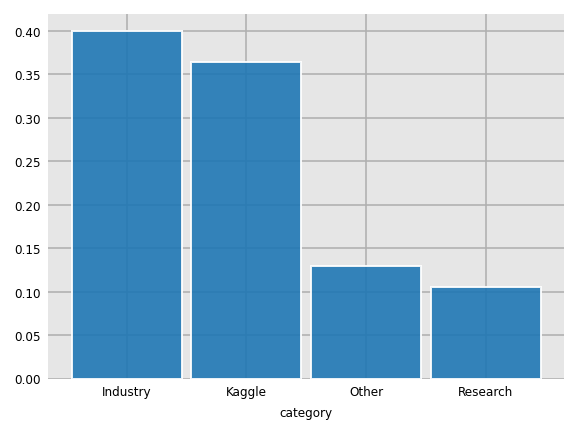

In [11]:
dxp.count(val='category', data=ctds_episodes,cmap='tab10',figsize=(4,3),normalize=True)


Most of the interviewed people belong to Industry followed by Kaggle. Well, let's drill down and see their breaup genderwise.

### Genderwise Category distribution

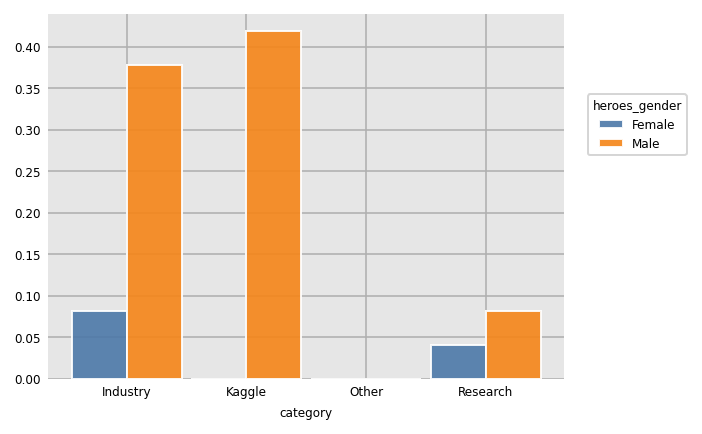

In [12]:
dxp.count(val='category', data=ctds_episodes,normalize=True,split='heroes_gender',figsize=(4,3))

CTDS show hasn't had any female Kaggler in the past. Is this the issue with CTDS show or the proportion of female Kagglers is actually low? 

### Nationality wise Category distribution

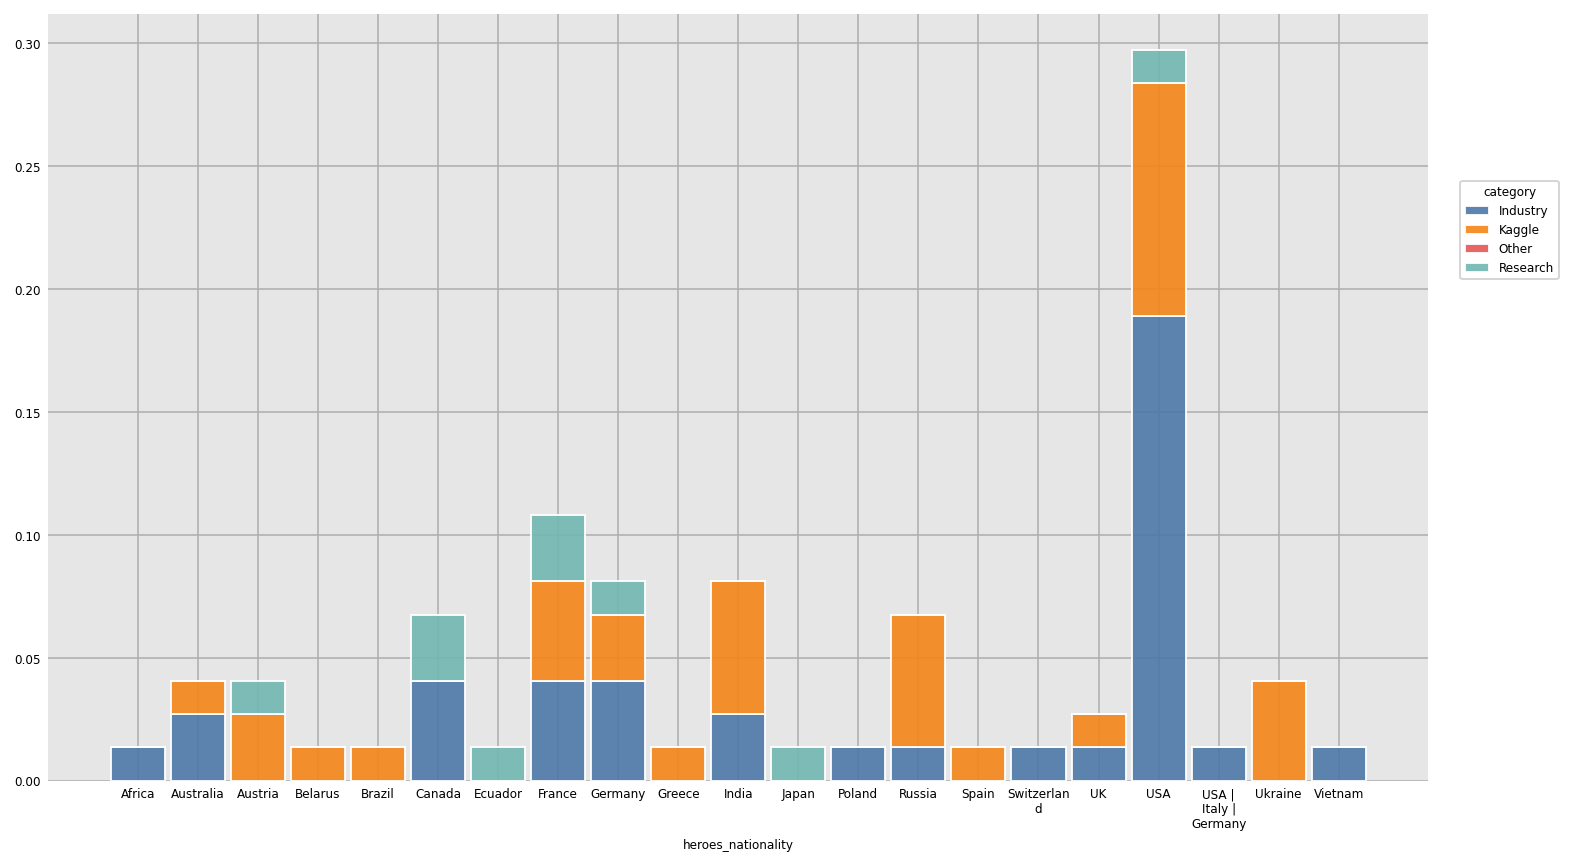

In [13]:
dxp.count(val='heroes_nationality', data=ctds_episodes, split='category',normalize=True,figsize=(10,6),size=0.9,stacked=True)

As understoof above, out of the all the people interviewed, USA leads in terms of people working in Industry. On the others, Canadian Researchers outnumber researchers from other countries.

## Tea

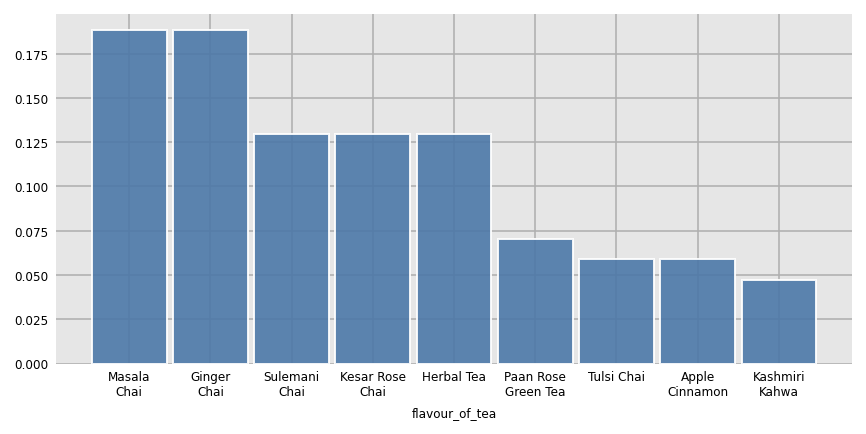

In [14]:
dxp.count(val='flavour_of_tea', data=ctds_episodes,normalize=True,figsize=(6,3))

Interestingly, Masala and Ginger Tea, has been CTDS show's favourite beverage. Does that affect the episode's popularity in any way? Well, go on and find out.

# Episodes
## Total no of Episodes recorded

In [15]:
ctds_episodes['episode_id'].count()

85


## Recording Time

In [16]:
labels = ctds_episodes['recording_time'].value_counts()[:10].index
values = ctds_episodes['recording_time'].value_counts()[:10].values
colors=['#bfbfbf','#3795bf','#2678bf','#98adbf']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

What could be the reason that most of the shows have been recorded at night? Well, its obvious. Most of the people who were interviewed are from US and hence they fall in a different time zone. Similarly, here are some other relationships that we can decipher from the data.

## Recording Time vs Tea Flavour

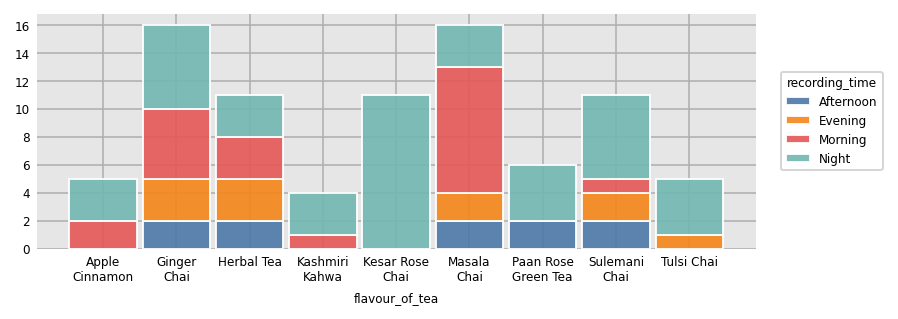

In [17]:
dxp.count(val='flavour_of_tea', data=ctds_episodes, split='recording_time', 
          orientation='v', stacked=True)

## Episode Duration in sec

In [18]:
ctds_episodes['episode_duration'].iplot(kind='area',fill=True,opacity=1,xTitle='Episode',yTitle='Duration(sec)')

## Episode Duration vs Release Date

In [19]:
df = ctds_episodes[['release_date','episode_duration']]
df.set_index('release_date').iplot(kind='scatter',mode='markers',symbol='cross',xTitle='Release Date',yTitle='Duration(sec)')

In [20]:
description.head()

,episode_id,description
0,E0,Interview with ML Hero Series: https://medium....
1,E1,"In the first Episode, Sanyam Bhutani interview..."
2,E2,Audio Version Available here: https://anchor.f...
3,E3,Audio Version available here: https://anchor.f...
4,E4,"In this Conversation, Sanyam Bhutani interview..."


## Preprocessing raw text

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Let's create a function which will perform the following tasks on the text columns:

Make text lowercase,
removes hyperlinks,
remove punctuation
removes numbers
tokenizes
removes stopwords

In [21]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

`clean_text()` function applies a first round of text cleaning techniques.the function text_preprocessing then takes in the processed text from the `clean_text()` function and applies techniques like tokenization and stop word removal.

In [22]:
# Applying the cleaning function to both test and training datasets
description['description'] = description['description'].apply(str).apply(lambda x: text_preprocessing(x))
description.head()

,episode_id,description
0,E0,interview with ml hero series a show for inter...
1,E1,in the first episode sanyam bhutani interviews...
2,E2,audio version available here in this episode s...
3,E3,audio version available here were super excite...
4,E4,in this conversation sanyam bhutani interviews...


Wordclouds would be a great way to explore which kinds of words dominate the description


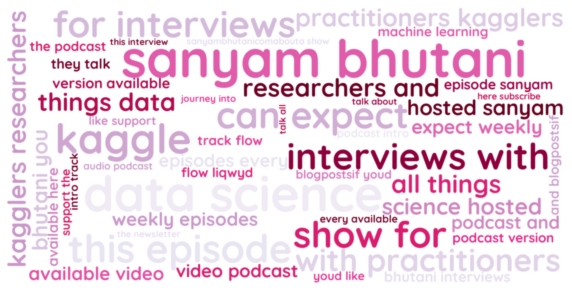

In [23]:
from wordcloud import WordCloud

font = '../input/quicksandboldttf/Quicksand-Bold.ttf'
word_cloud = WordCloud(font_path=font,
                       width=1600,
                       height=800,
                       colormap='PuRd', 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=20,  # Font size range
                       background_color="white").generate(" ".join(description['description']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()


# Conclusion

> These are some of the ways in which you can explore this data and create a story around it.Remember that the motive of analysis is not to output pretty charts but to elicit important information from the data. It is just what Ben Shneiderman said, "The purpose of visualization is insight, not pictures".